In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn as skl
from sklearn.ensemble import RandomForestRegressor
from sklearn import grid_search
from sklearn.neighbors import KNeighborsRegressor

### read in the image 

In [2]:
file = "Mona_Lisa.png"

In [3]:
im = misc.imread(file)
im.shape

(900, 604, 3)

In [4]:
def sample_xy_coordinates(im, n=5000):
    length = im.shape[0]
    width = im.shape[1]
    x = np.asarray(np.random.randint(0, width, n))
    y = np.asarray(np.random.randint(0, length, n))
    return x, y
    

In [5]:
x, y = sample_xy_coordinates(im)
print x.shape
print y.shape
print im.shape

(5000,)
(5000,)
(900, 604, 3)


In [6]:
# part c.
# grayscale
sample_pixels = im[y, x, :]
sample_pixels.shape 

(5000, 3)

In [106]:

# print im.shape
# print im[1].shape
# print im[:,1].shape
# print im[:,:,1].shape
# print im[0, 0, :].shape
# print im[[0, 3], [0, 2], :].shape
# im[[0, 3], [0, 2], :]

In [8]:
grayscale_sample_pixels = np.dot(sample_pixels, [0.299, 0.587, 0.144])

In [9]:
grayscale_sample_pixels = grayscale_sample_pixels / np.max(grayscale_sample_pixels)

In [10]:
X = np.array([x, y]).T

### Random Forest

In [12]:
#gray
rf_gray = RandomForestRegressor()
rf_gray.fit(X, grayscale_sample_pixels)

#color
rf_color = RandomForestRegressor()
rf_color.fit(X, sample_pixels)

#individual
rf_red = RandomForestRegressor()
rf_green = RandomForestRegressor()
rf_blue = RandomForestRegressor()

rf_red.fit(X, sample_pixels[:,0])
rf_green.fit(X, sample_pixels[:,1])
rf_blue.fit(X, sample_pixels[:,2])


RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=10, n_jobs=1, oob_score=False,
           random_state=None, verbose=0)

In [13]:
#arrange input so that it gets every x and y coordinate of the grid.
y_coord = np.arange(im.shape[0])
x_coord = np.arange(im.shape[1])

flat_image_shape = im.shape[0] * im.shape[1]

x_coord = np.tile(x_coord, (im.shape[0], 1))
y_coord = np.tile(y_coord, (im.shape[1], 1)).T

coord = np.ndarray((flat_image_shape, 2), dtype=int)
coord[:, 0] = x_coord.reshape(flat_image_shape)
coord[:, 1] = y_coord.reshape(flat_image_shape)


In [15]:
#gray
im_pred_gray = rf_gray.predict(coord)

#color
im_pred_color = rf_color.predict(coord)

#individual channels
im_pred_red = rf_red.predict(coord)
im_pred_green = rf_green.predict(coord)
im_pred_blue = rf_blue.predict(coord)

In [17]:
# Gray
new_image_gray = im_pred_gray.reshape((900, 604)) 

# Color
new_image_color = np.asarray(im_pred_color.reshape((900,604,3)), dtype='uint8')

# Individual channels
new_image_red = im_pred_red.reshape((900,604))
new_image_green = im_pred_green.reshape((900,604))
new_image_blue = im_pred_blue.reshape((900,604))
new_image = np.zeros(im.shape, dtype='uint8')
new_image[:,:,0] = im_pred_red.reshape((900, 604)) 
new_image[:,:,1] = im_pred_green.reshape((900, 604)) 
new_image[:,:,2] = im_pred_blue.reshape((900, 604)) 


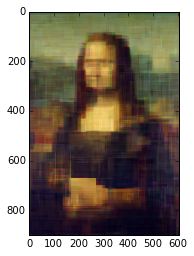

In [18]:
plt.imshow(new_image)
# plt.savefig("rf_ind_channel.png")

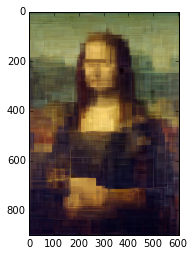

In [19]:
plt.imshow(new_image_color)
# plt.savefig("rf_color.png")

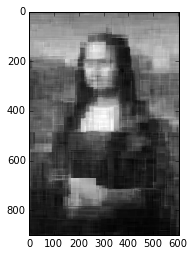

In [20]:
plt.imshow(new_image_gray, cmap='gray')
# plt.savefig("rf_gray.png")

### g. experimentation

In [21]:

parameters = {'max_depth':[1, 2, 3, 5, 10, 15]}

# rfgrid = grid_search.GridSearchCV(rf_color, parameters)
# rfgrid.fit(X, sample_pixels)

In [22]:
pred = []

for depth in parameters['max_depth']:
    rf_color = RandomForestRegressor(n_estimators=1, max_depth=depth)
    rf_color.fit(X, sample_pixels)
    pred.append(rf_color.predict(coord))

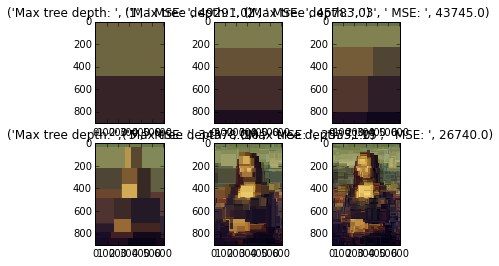

In [23]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (30.0,20.0)
for x in xrange(len(pred)):
    ax = fig.add_subplot(2, 3, x+1)
    plt.imshow(np.asarray(pred[x].reshape((900,604,3)), dtype='uint8'))
    plt_string = 'Max tree depth: ', str(parameters['max_depth'][x]), \
                    ' MSE: ', np.round(np.linalg.norm(pred[x].reshape((900,604,3)) - im))
    ax.set_title(plt_string)
# plt.savefig("rf_color_vary_maxdepth.png")

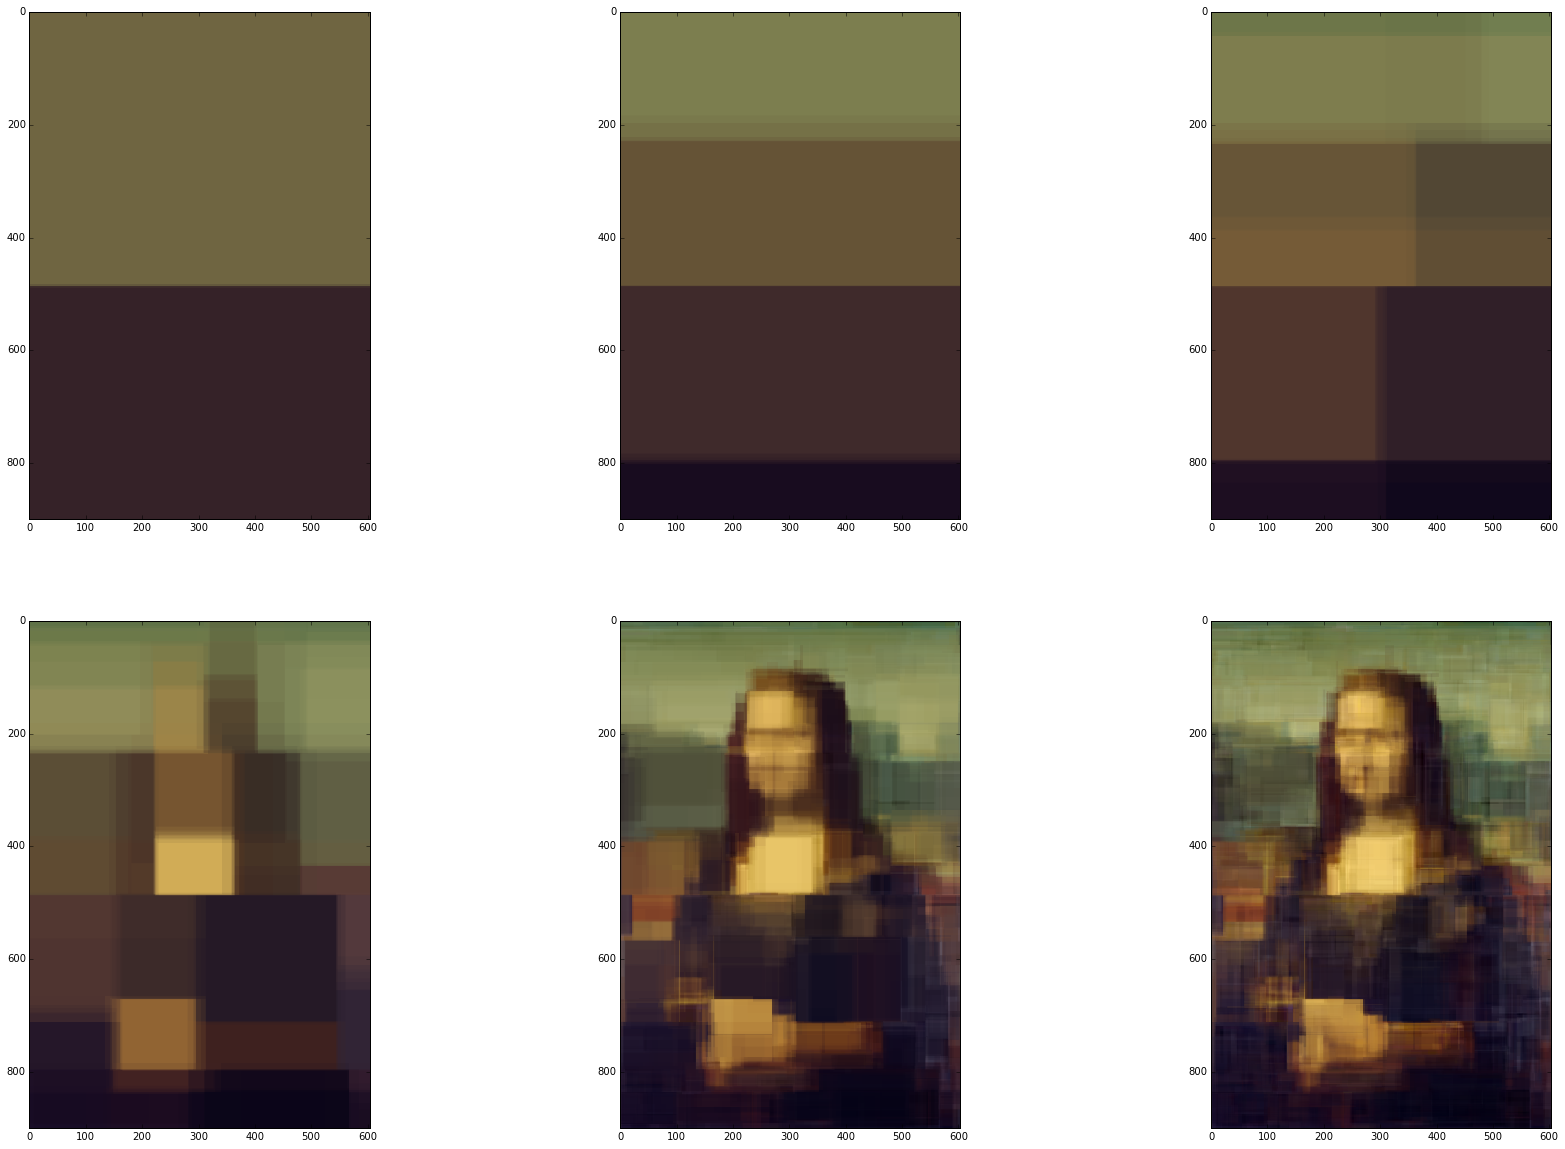

In [115]:
#increase number of trees to see what it looks like
pred = []

for depth in parameters['max_depth']:
    rf_color = RandomForestRegressor(n_estimators=10, max_depth=depth)
    rf_color.fit(X, sample_pixels)
    pred.append(rf_color.predict(coord))
fig = plt.figure()
plt.rcParams['figure.figsize'] = (30.0,20.0)
for x in xrange(len(pred)):
    ax = fig.add_subplot(2, 3, x+1)
    plt.imshow(np.asarray(pred[x].reshape((900,604,3)), dtype='uint8'))

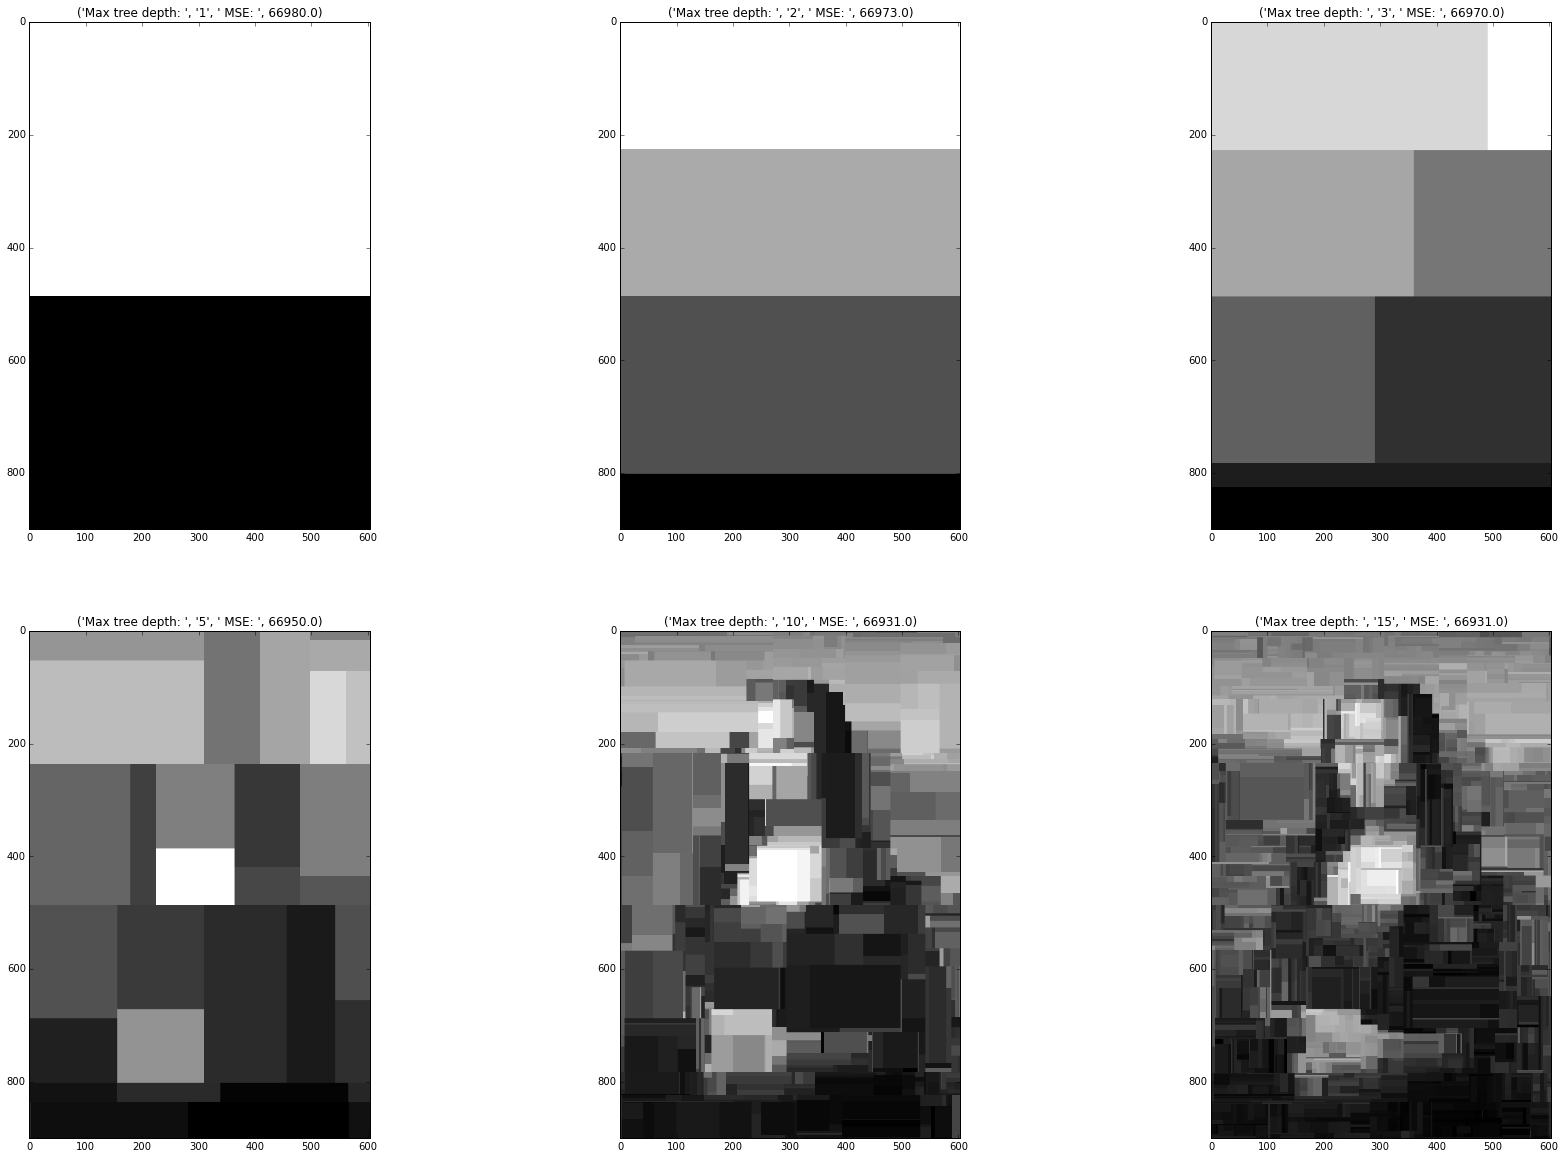

In [24]:
pred = []

for depth in parameters['max_depth']:
    rf_gray = RandomForestRegressor(n_estimators=1, max_depth=depth)
    rf_gray.fit(X, grayscale_sample_pixels)
    pred.append(rf_gray.predict(coord))
    
fig = plt.figure()
plt.rcParams['figure.figsize'] = (30.0,20.0)
for x in xrange(len(pred)):
    ax = fig.add_subplot(2, 3, x+1)
    plt.imshow(np.asarray(pred[x].reshape((900,604))), cmap='gray')
    plt_string = 'Max tree depth: ', str(parameters['max_depth'][x]),\
                    ' MSE: ', np.round(np.linalg.norm(pred[x].reshape((900,604)) - np.dot(im, [0.299, 0.587, 0.144])))
    ax.set_title(plt_string)

# plt.savefig("rf_gray_vary_maxdepth.png")

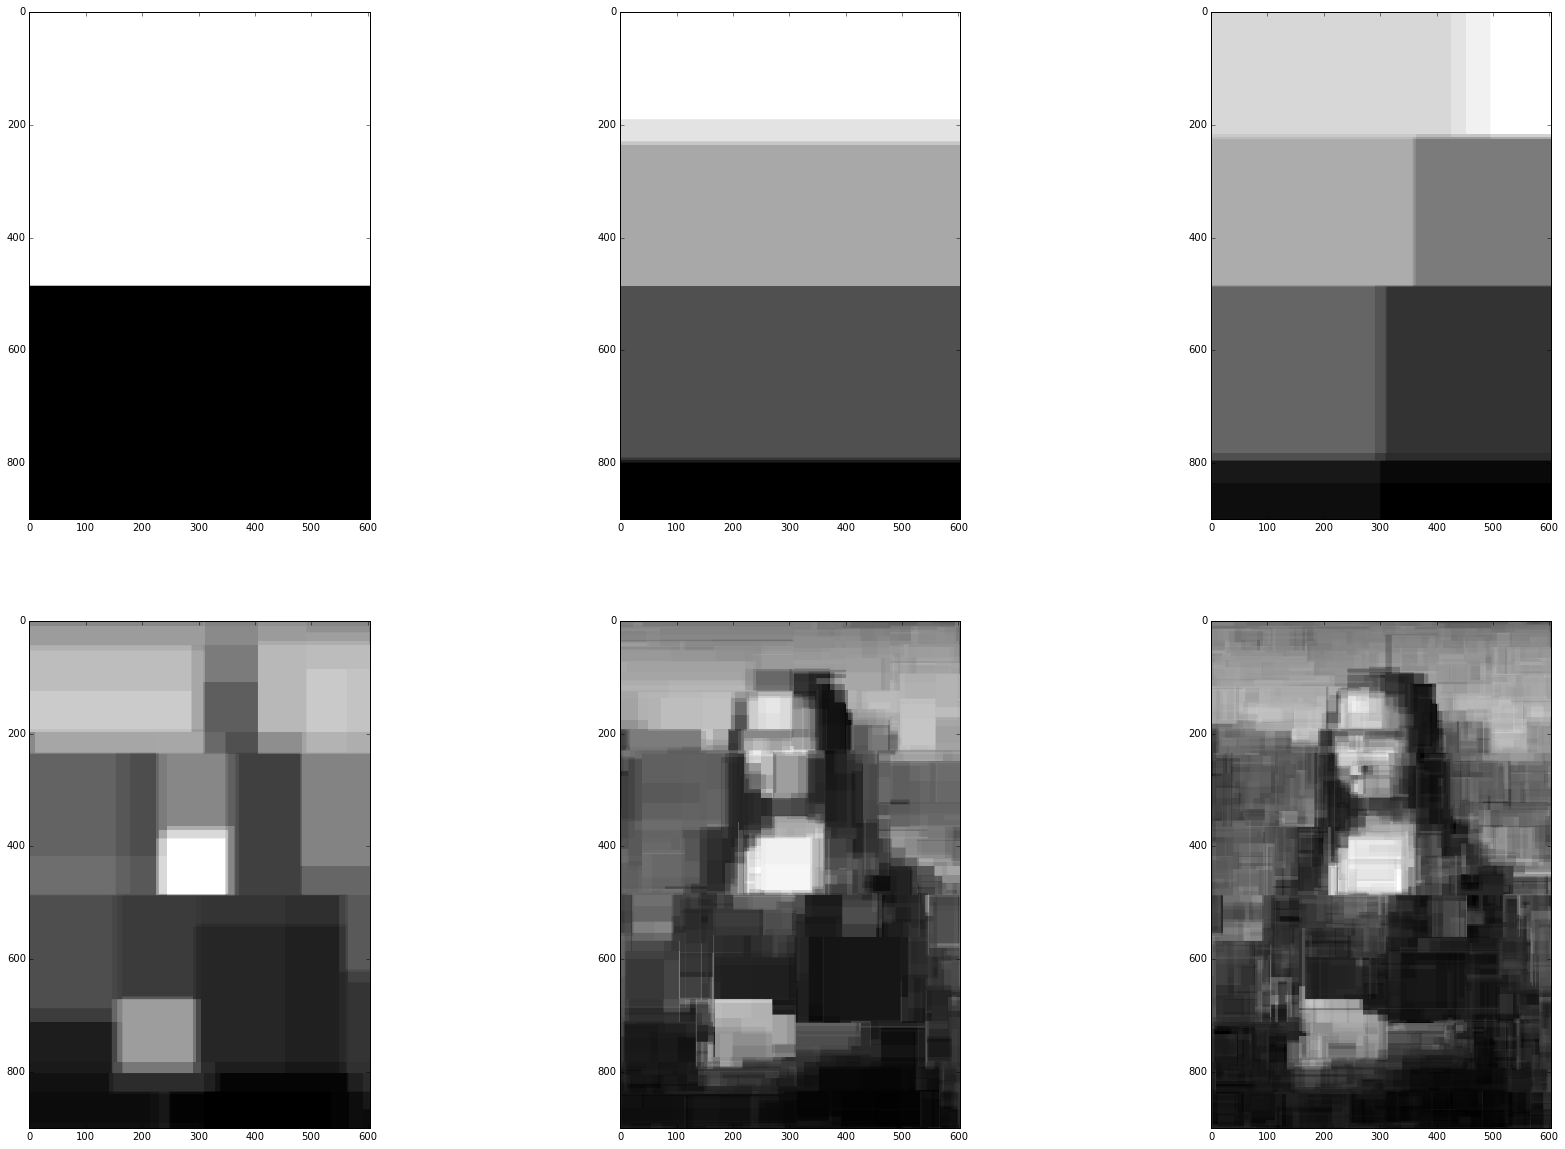

In [110]:
#increase number of trees to see what it loooks like.
pred = []

for depth in parameters['max_depth']:
    rf_gray = RandomForestRegressor(n_estimators=3, max_depth=depth)
    rf_gray.fit(X, grayscale_sample_pixels)
    pred.append(rf_gray.predict(coord))
    
fig = plt.figure()
plt.rcParams['figure.figsize'] = (30.0,20.0)
for x in xrange(len(pred)):
    ax = fig.add_subplot(2, 3, x+1)
    plt.imshow(np.asarray(pred[x].reshape((900,604))), cmap='gray')
#     plt_string = 'Max tree depth: ', str(parameters['max_depth'][x]),\
#                     ' MSE: ', np.round(np.linalg.norm(pred[x].reshape((900,604)) - np.dot(im, [0.299, 0.587, 0.144])))
#     ax.set_title(plt_string)


In [477]:
# Repeattheexperimentforarandomforestofdepth7,
# butwithnumberoftreesequalto1,3, 5, 10, and 100. 
# How does the number of trees impact the result? Describe in detail why.

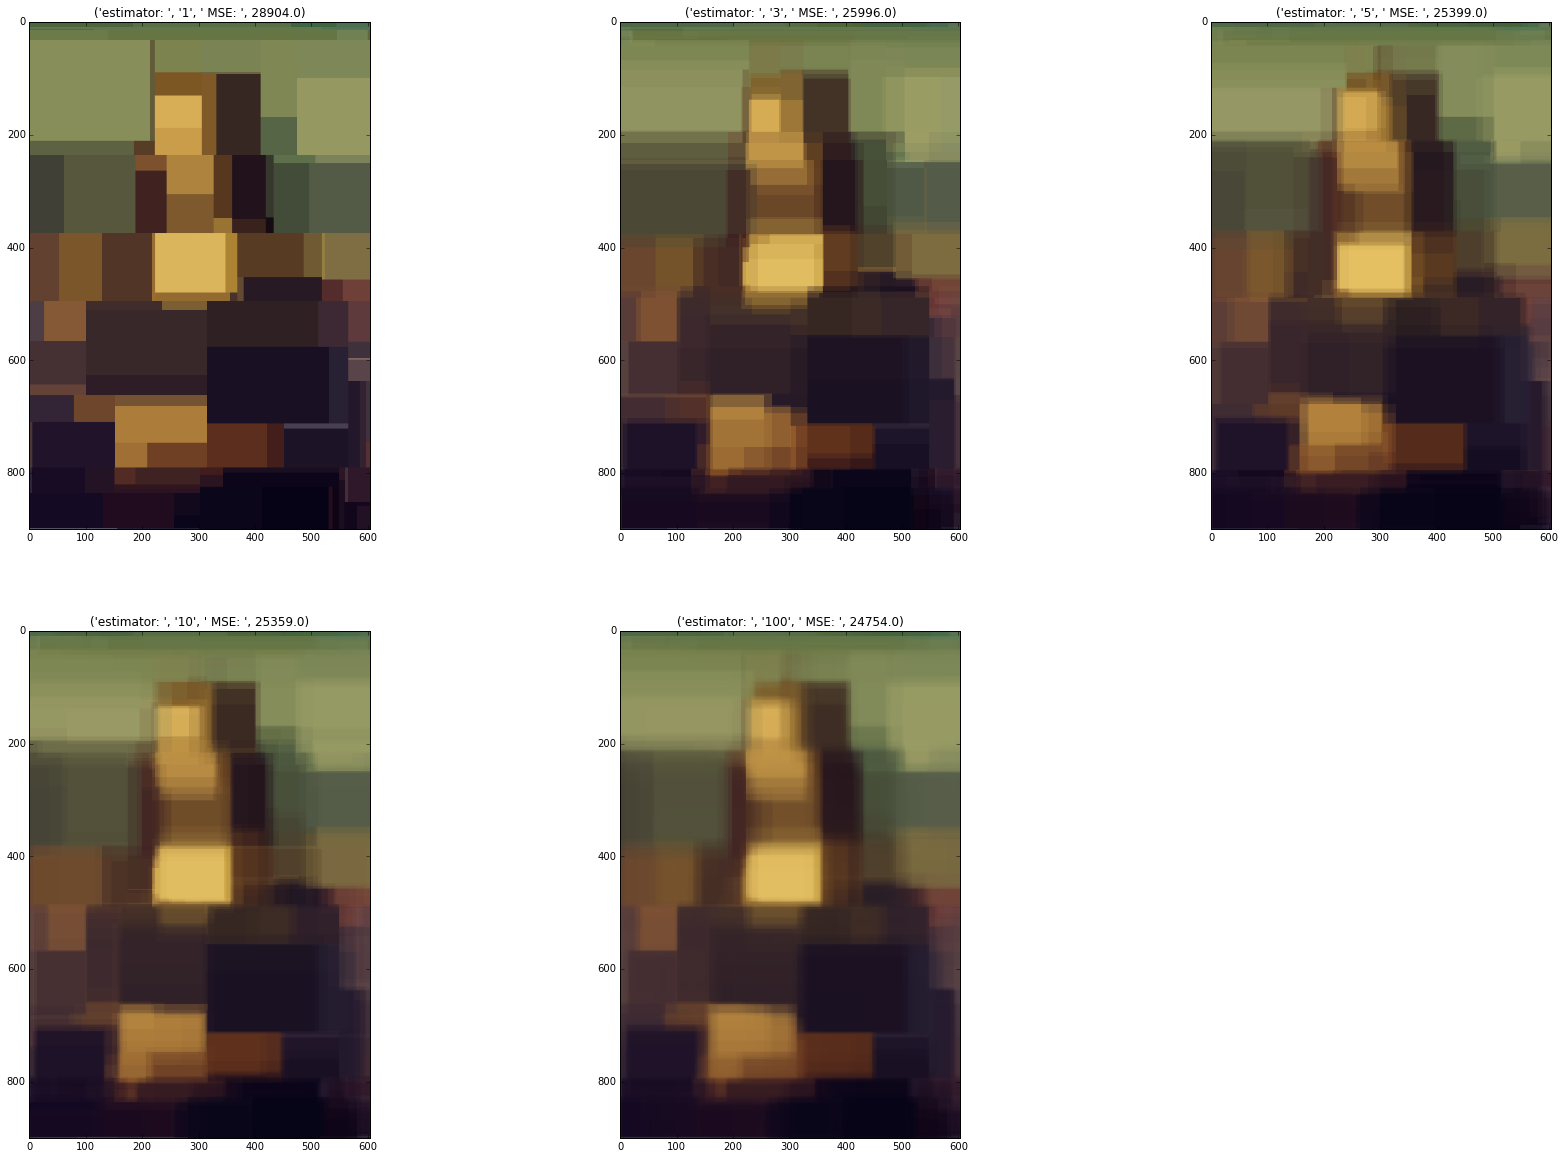

In [567]:
parameters2 = {'n_estimators':[1, 3, 5, 10, 100]}
pred2 = []

for est in parameters2['n_estimators']:
    rf_color = RandomForestRegressor(n_estimators=est, max_depth=7)
    rf_color.fit(X, sample_pixels)
    pred2.append(rf_color.predict(coord))

fig = plt.figure()
plt.rcParams['figure.figsize'] = (30.0,20.0)
for x in xrange(len(pred2)):
    ax = fig.add_subplot(2, 3, x+1)
    plt.imshow(np.asarray(pred2[x].reshape((900,604,3)), dtype='uint8'))
    plt_string = 'estimator: ', str(parameters2['n_estimators'][x]), \
                    ' MSE: ', np.round(np.linalg.norm(pred2[x].reshape((900,604,3)) - im))
    ax.set_title(plt_string)

plt.savefig("rf_color_vary_nestimators.png")   

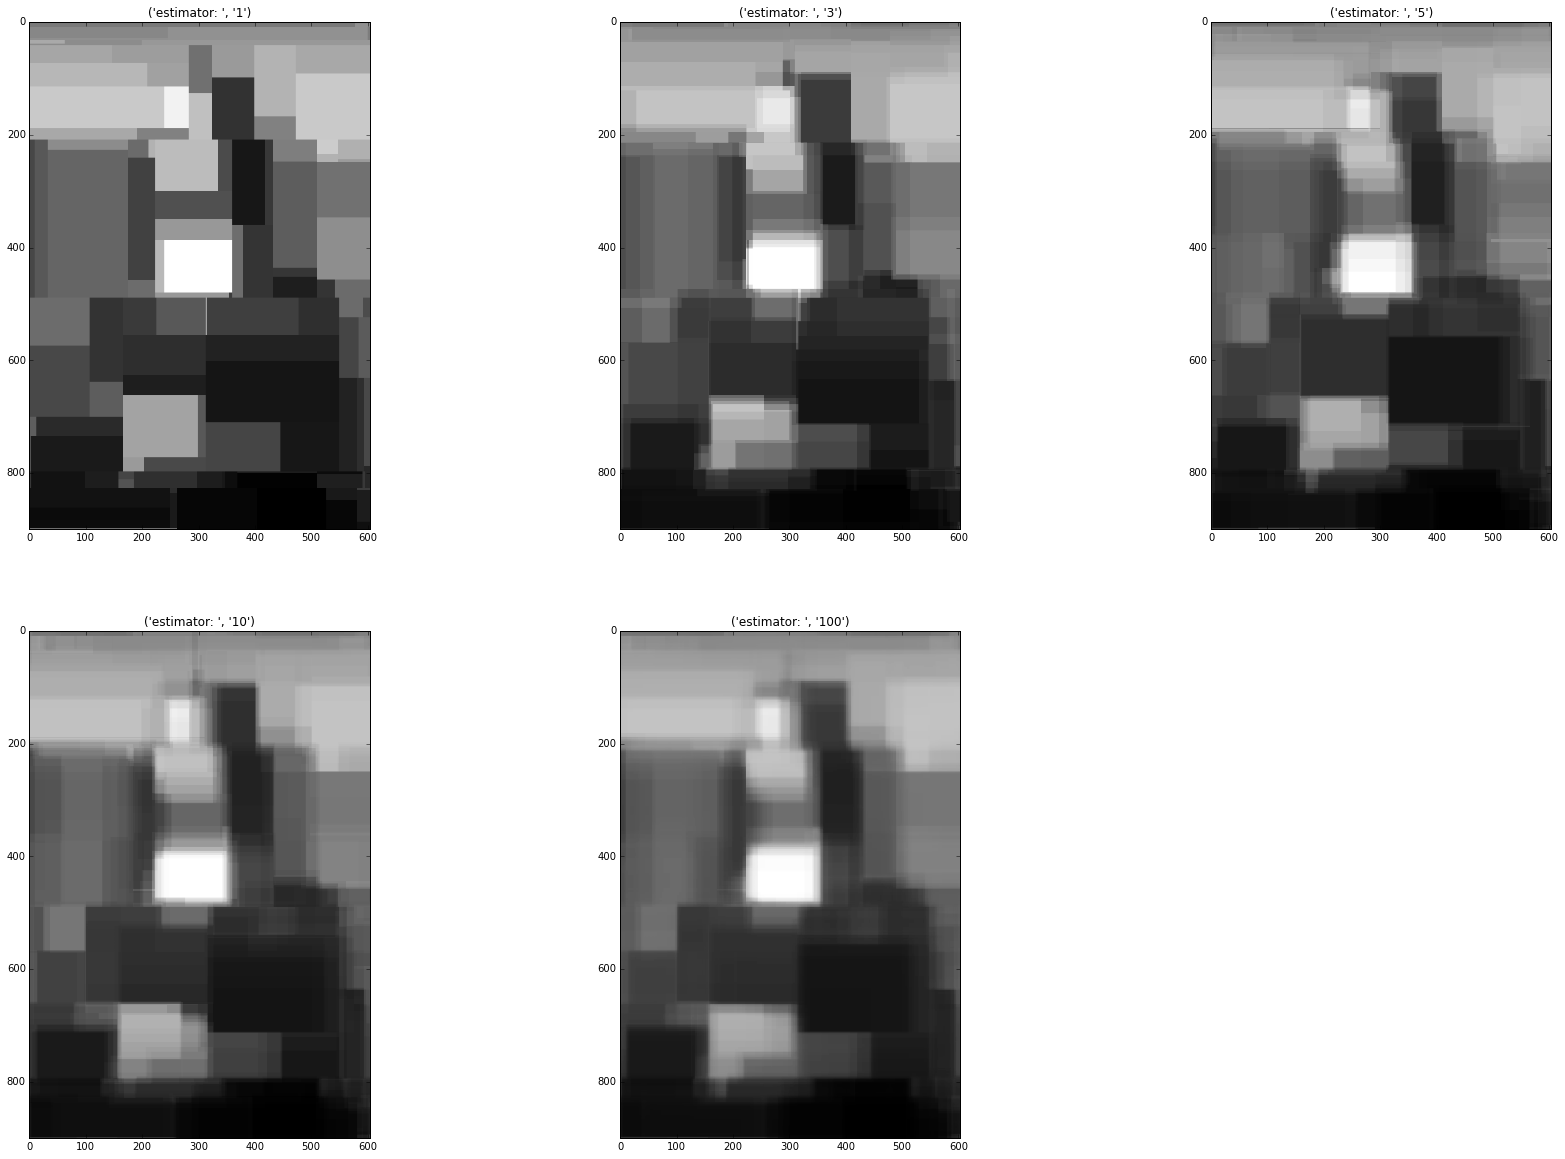

In [572]:
pred2 = []

for est in parameters2['n_estimators']:
    rf_gray = RandomForestRegressor(n_estimators=est, max_depth=7)
    rf_gray.fit(X, grayscale_sample_pixels)
    pred2.append(rf_gray.predict(coord))

fig = plt.figure()
plt.rcParams['figure.figsize'] = (30.0,20.0)
for x in xrange(len(pred2)):
    ax = fig.add_subplot(2, 3, x+1)
    plt.imshow(np.asarray(pred2[x].reshape((900,604))), cmap='gray')
    plt_string = 'estimator: ', str(parameters2['n_estimators'][x])
#     plt_string = 'estimator: ', str(parameters2['n_estimators'][x]), \
#                     ' MSE: ', np.round(np.linalg.norm(pred2[x].reshape((900,604)) - im))
    ax.set_title(plt_string)

plt.savefig("rf_gray_vary_nestimators.png")

### KNN

In [500]:
# KNN regressor
# every pixel in the output will equal the nearest pixel from the “training set.”

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X, grayscale_sample_pixels)

knn_gray_pred = knn.predict(coord)
coord.shape
knn_gray_pred.shape

(543600,)

In [25]:
X.shape

(5000, 2)

In [26]:
coord.shape

(543600, 2)

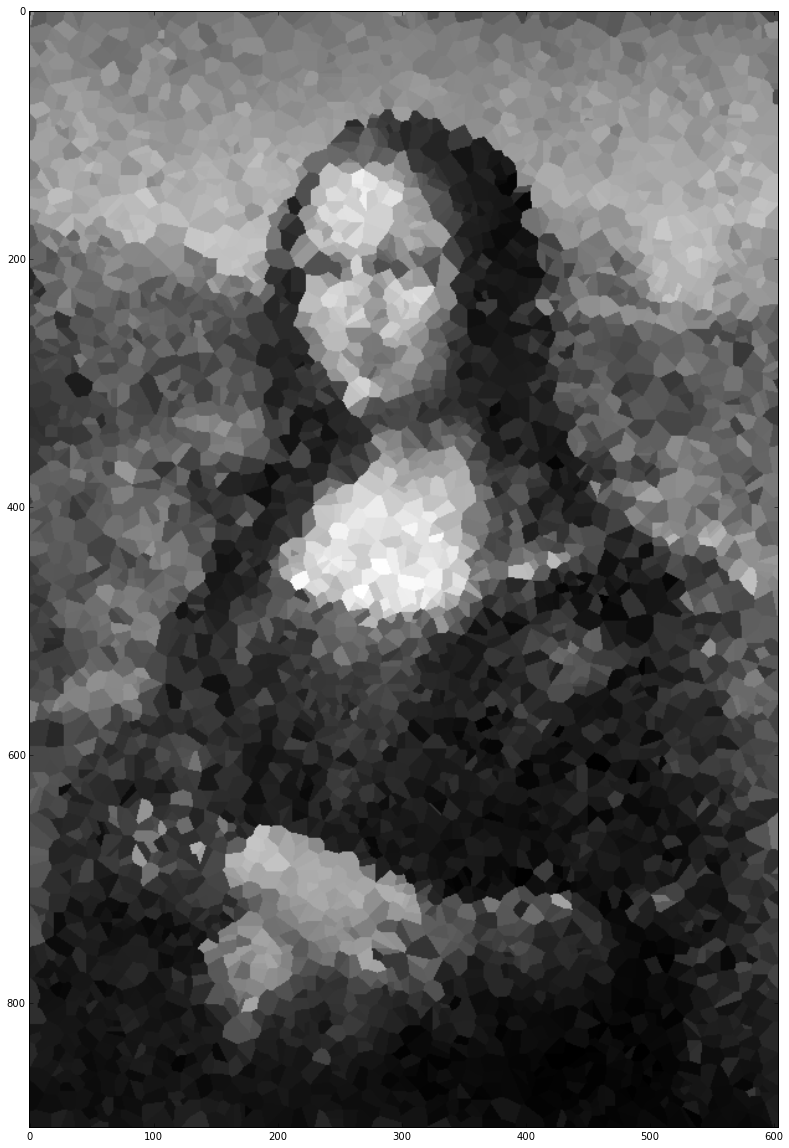

In [501]:
plt.imshow(knn_gray_pred.reshape((900,604)), cmap='gray')
plt.savefig("knn.png")

In [574]:

knn2 = KNeighborsRegressor(n_neighbors=1)
knn2.fit(X, sample_pixels)

knn_color_pred = knn2.predict(coord)


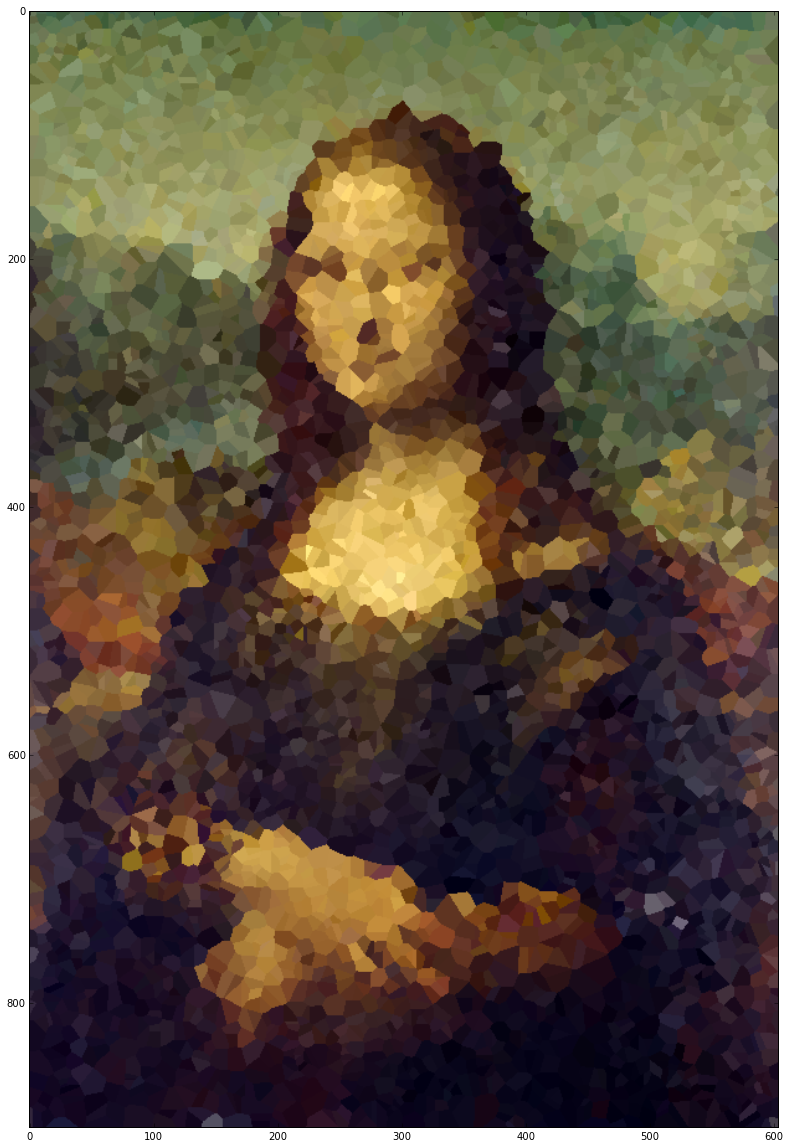

In [575]:
new_image_color = np.asarray(knn_color_pred.reshape((900,604,3)), dtype='uint8')

plt.imshow(new_image_color)

plt.savefig("knn_color.png")


In [ ]:
#1.convert to greyscale
plt.imshow(X_test[10, :].reshape(50,50), cmap = cm.Greys_r)

### inspect decision tree split points

In [104]:
rf_color = RandomForestRegressor(n_estimators=1)
rf = rf_color.fit(X, sample_pixels)

rf.estimators_

[DecisionTreeRegressor(compute_importances=None, criterion='mse',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1262462302, splitter='best')]

In [101]:
from sklearn import tree 
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, sample_pixels)
# tree.export_graphviz(clf,out_file='a.dot') 

In [102]:
clf.tree_.max_depth
clf.tree_.threshold
clf.tree_.n_node_samples
clf.tree_.feature
clf.tree_.children_left
clf.tree_.children_right

27

In [83]:
X2.shape

(5000, 2)

In [80]:
X2 = pd.DataFrame(X)

In [81]:
zip(X2.columns[clf.tree_.feature], clf.tree_.threshold, clf.tree_.children_left, clf.tree_.children_right)


[(1, 486.5, 1, 5302),
 (1, 108.5, 2, 1167),
 (1, 49.5, 3, 552),
 (1, 26.5, 4, 275),
 (1, 13.5, 5, 146),
 (1, 5.5, 6, 75),
 (0, 124.5, 7, 20),
 (0, 56.0, 8, 13),
 (0, 31.0, 9, 10),
 (0, -2.0, -1, -1),
 (1, 3.0, 11, 12),
 (0, -2.0, -1, -1),
 (0, -2.0, -1, -1),
 (0, 82.0, 14, 17),
 (0, 71.5, 15, 16),
 (0, -2.0, -1, -1),
 (0, -2.0, -1, -1),
 (0, 98.5, 18, 19),
 (0, -2.0, -1, -1),
 (0, -2.0, -1, -1),
 (1, 0.5, 21, 28),
 (0, 175.0, 22, 23),
 (0, -2.0, -1, -1),
 (0, 360.5, 24, 25),
 (0, -2.0, -1, -1),
 (0, 552.0, 26, 27),
 (0, -2.0, -1, -1),
 (0, -2.0, -1, -1),
 (0, 593.5, 29, 74),
 (0, 581.5, 30, 73),
 (0, 566.5, 31, 72),
 (0, 497.0, 32, 67),
 (0, 423.5, 33, 62),
 (1, 3.5, 34, 55),
 (0, 227.0, 35, 42),
 (0, 164.0, 36, 37),
 (0, -2.0, -1, -1),
 (0, 188.0, 38, 39),
 (0, -2.0, -1, -1),
 (0, 193.0, 40, 41),
 (0, -2.0, -1, -1),
 (0, -2.0, -1, -1),
 (0, 400.0, 43, 52),
 (1, 1.5, 44, 47),
 (0, 301.0, 45, 46),
 (0, -2.0, -1, -1),
 (0, -2.0, -1, -1),
 (0, 315.0, 48, 49),
 (0, -2.0, -1, -1),
 (0, 353.

### different pruning strategies

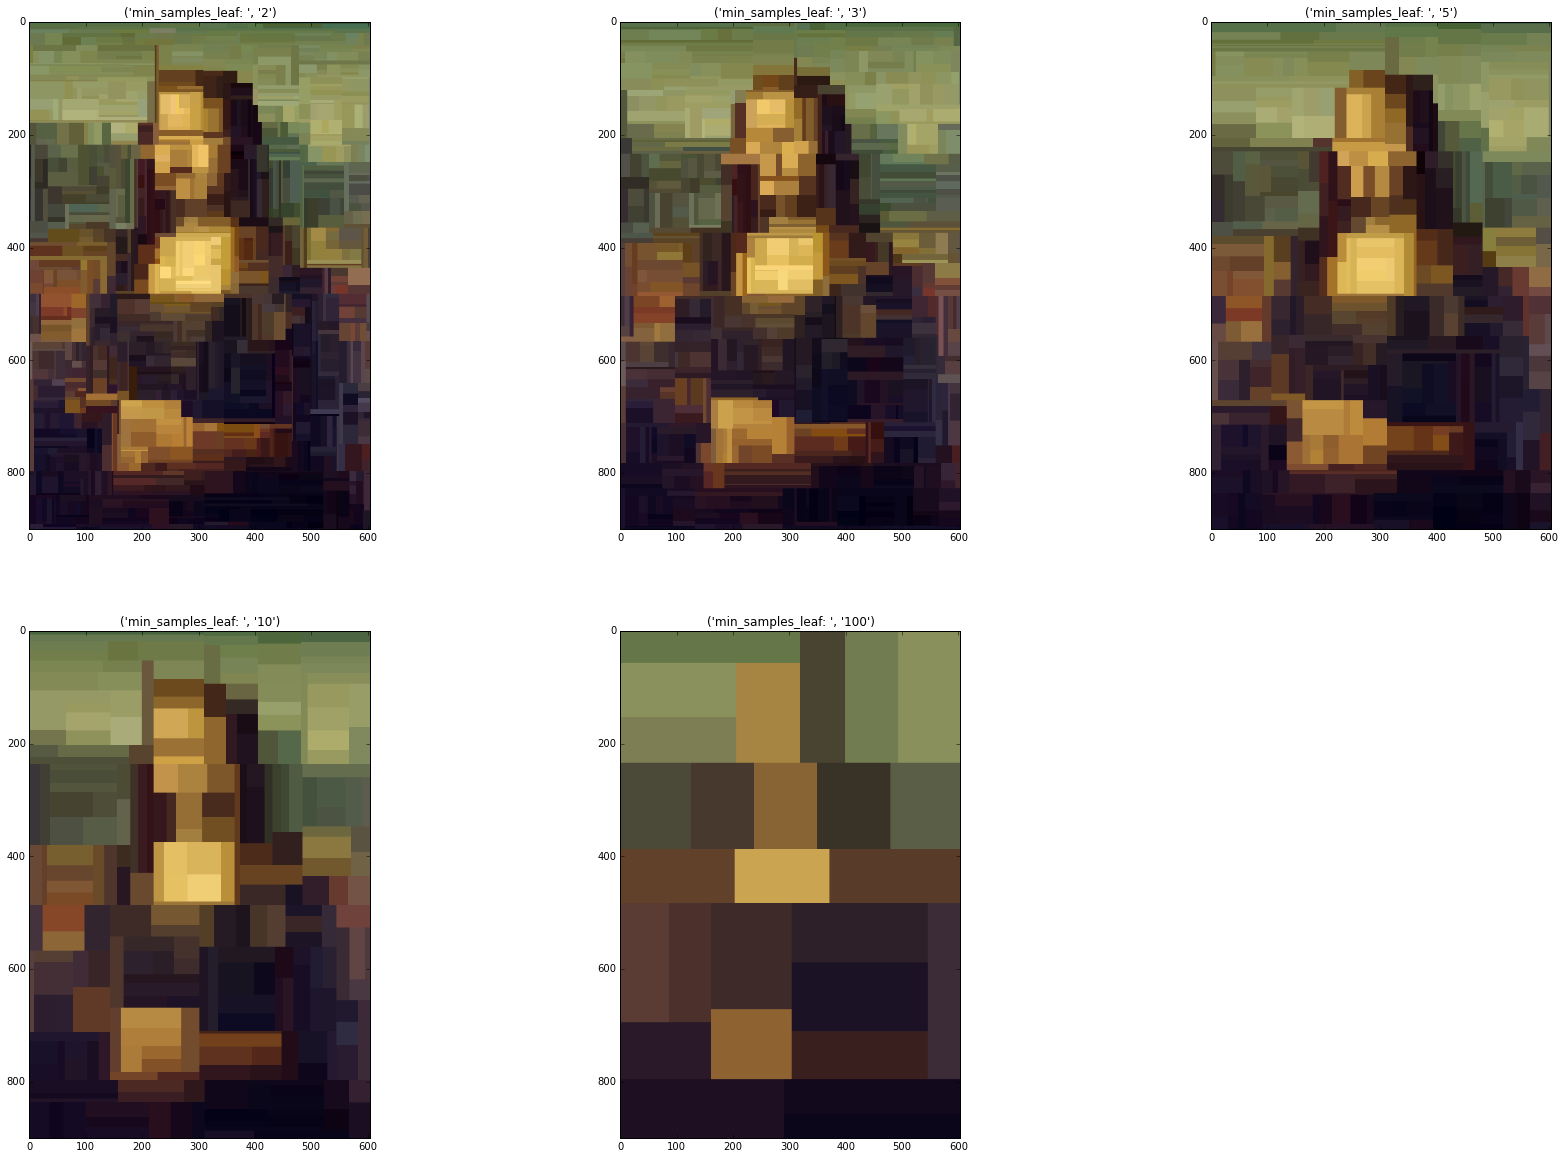

In [57]:
parameters2 = {'min_samples_leaf':[2, 3, 5, 10, 100]}
pred2 = []

for est in parameters2['min_samples_leaf']:
    rf_color = RandomForestRegressor(n_estimators=1, min_samples_leaf=est)
    rf_color.fit(X, sample_pixels)
    pred2.append(rf_color.predict(coord))

fig = plt.figure()
plt.rcParams['figure.figsize'] = (30.0,20.0)
for x in xrange(len(pred2)):
    ax = fig.add_subplot(2, 3, x+1)
    plt.imshow(np.asarray(pred2[x].reshape((900,604,3)), dtype='uint8'))
    plt_string = 'min_samples_leaf: ', str(parameters2['min_samples_leaf'][x]) \
#                     ' MSE: ', np.round(np.linalg.norm(pred2[x].reshape((900,604,3)) - im))
    ax.set_title(plt_string)

plt.savefig("rf_color_vary_min_samples.png")   

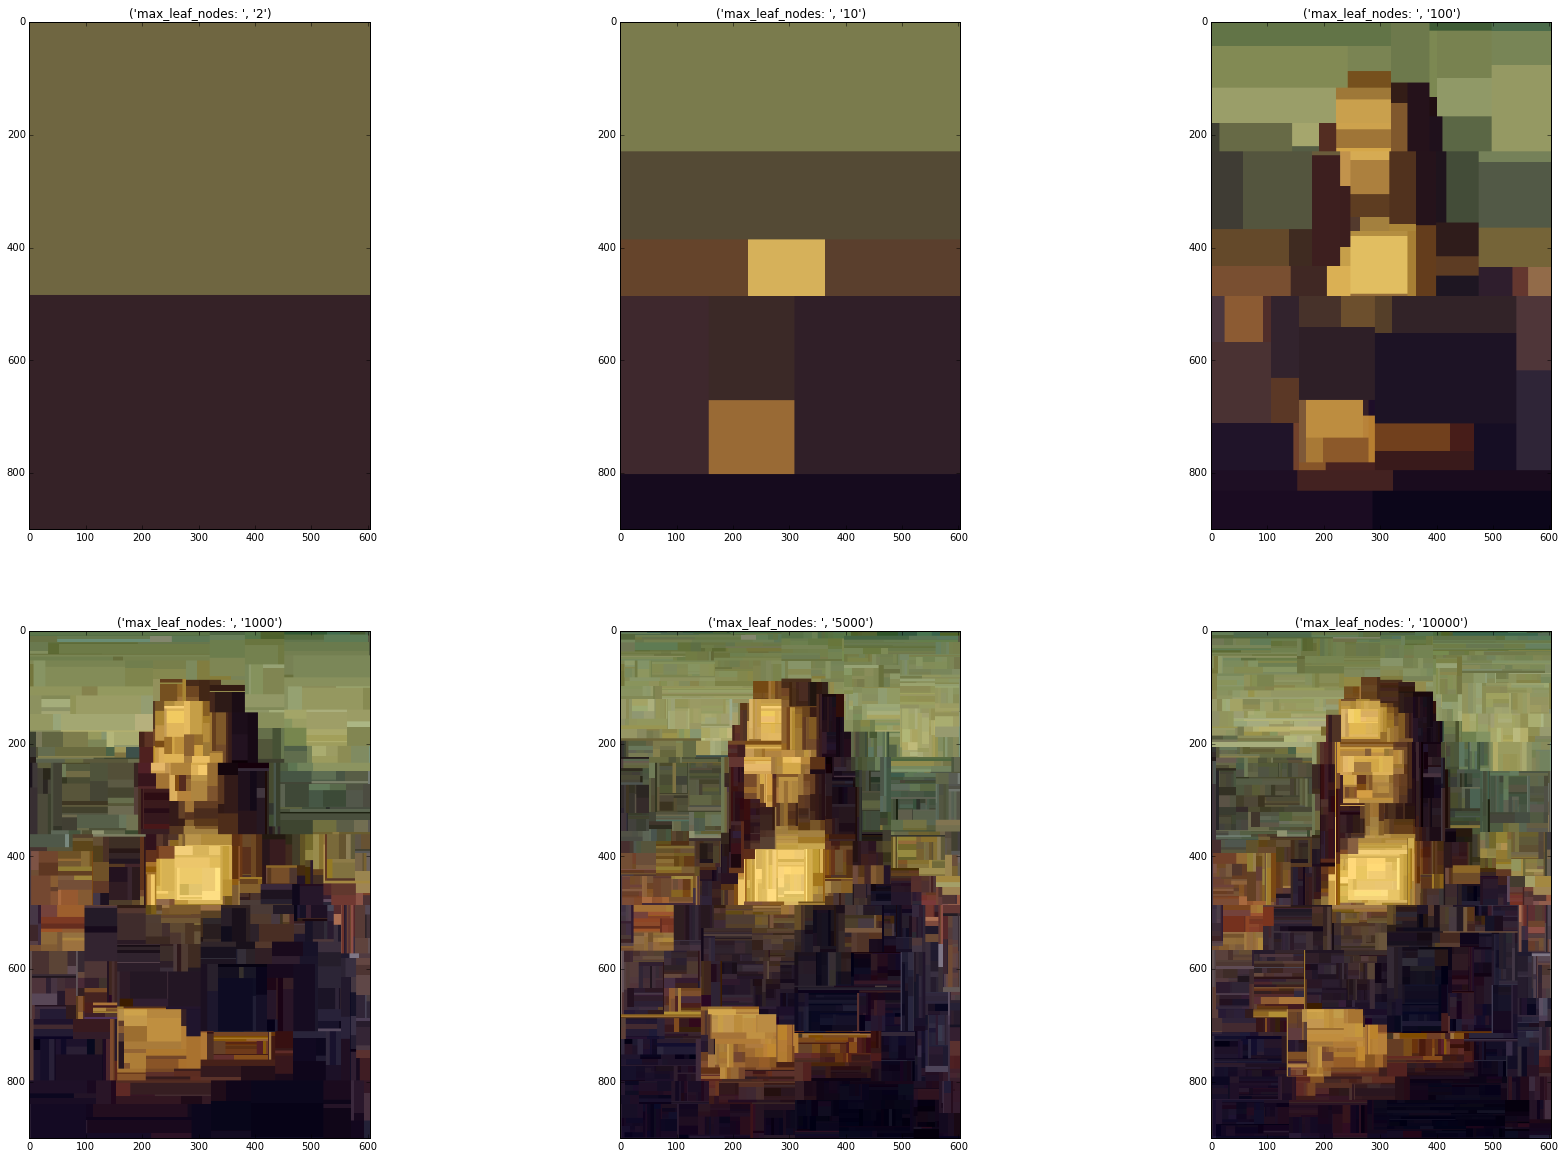

In [56]:
parameters2 = {'max_leaf_nodes':[2, 10, 100, 1000,5000, 10000]}
pred2 = []

for est in parameters2['max_leaf_nodes']:
    rf_color = RandomForestRegressor(n_estimators=1, max_leaf_nodes=est)
    rf_color.fit(X, sample_pixels)
    pred2.append(rf_color.predict(coord))

fig = plt.figure()
plt.rcParams['figure.figsize'] = (30.0,20.0)
for x in xrange(len(pred2)):
    ax = fig.add_subplot(2, 3, x+1)
    plt.imshow(np.asarray(pred2[x].reshape((900,604,3)), dtype='uint8'))
    plt_string = 'max_leaf_nodes: ', str(parameters2['max_leaf_nodes'][x]) \
#                     ' MSE: ', np.round(np.linalg.norm(pred2[x].reshape((900,604,3)) - im))
    ax.set_title(plt_string)

plt.savefig("rf_color_vary_maxleaves.png")   

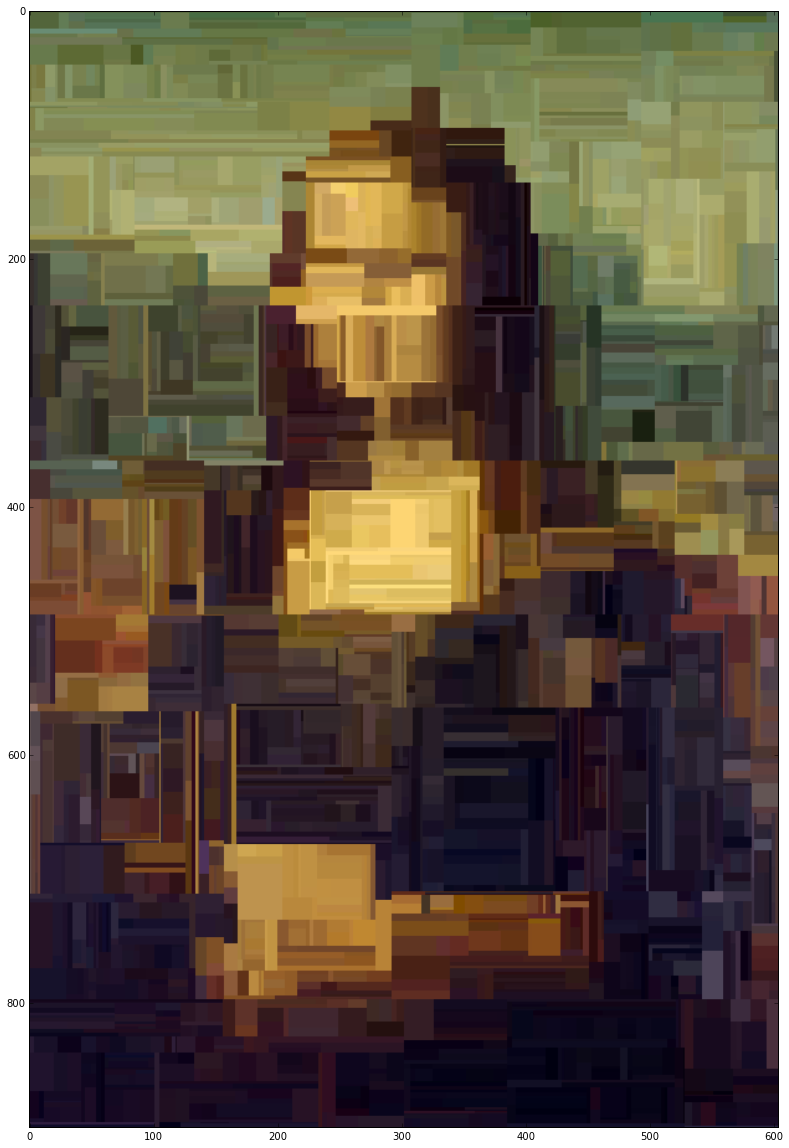

In [53]:
# rfp = RandomForestRegressor(n_estimators=1, min_samples_split = 4)
rfp = RandomForestRegressor(n_estimators=1)
#rf_color = RandomForestRegressor()
rfp.fit(X, sample_pixels)
im = rfp.predict(coord)
i = np.asarray(im.reshape((900,604,3)), dtype='uint8')
plt.imshow(i)